In [36]:
import axelrod as axl
import numpy as np

from axelrod.action import Action
from axelrod.strategies.lookerup import Plays

import opt_mo
import pandas as pd
C, D = Action.C, Action.D

In [37]:
import matplotlib.pyplot as plt
import matplotlib

In [38]:
color = matplotlib.cm.viridis(0.3)

In [39]:
font = {"size": 10, "weight": "bold"}
matplotlib.rc("font", **font)

In [40]:
params = [1, 1, 2]

In [41]:
df_with_g = opt_mo.tools.read_sql_data_frame('../data/with_gambler/main_seed_two.db')
df = opt_mo.tools.read_sql_data_frame('../data/with_gambler/main.db')

In [42]:
df_with_g.describe()

,exp_index,first_opponent_q_1,first_opponent_q_2,first_opponent_q_3,first_opponent_q_4,second_opponent_q_1,second_opponent_q_2,second_opponent_q_3,second_opponent_q_4,mem_one_p_1,...,gambler_paramater_p_8,gambler_paramater_p_9,gambler_paramater_p_10,gambler_paramater_p_11,gambler_paramater_p_12,gambler_paramater_p_13,gambler_paramater_p_14,gambler_paramater_p_15,gambler_paramater_p_16,gambler_utility
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,...,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,131.000000,0.516555,0.497940,0.558057,0.504496,0.541236,0.509979,0.512272,0.464960,0.285494,...,0.382314,0.063683,0.103465,0.523237,0.499970,0.164148,0.239205,0.575531,0.545329,3.111622
std,18.330303,0.307204,0.266219,0.314378,0.323988,0.246863,0.310097,0.290613,0.271095,0.416072,...,0.388064,0.239159,0.300311,0.373044,0.392994,0.338630,0.425693,0.400841,0.406288,0.598589
min,100.000000,0.001510,0.030188,0.016421,0.001682,0.024474,0.001633,0.015054,0.016723,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.657485
25%,115.500000,0.240519,0.230724,0.253737,0.217164,0.369625,0.217279,0.275926,0.217876,0.000000,...,0.000000,0.000000,0.000000,0.168808,0.078089,0.000000,0.000000,0.171626,0.097981,2.680315
50%,131.000000,0.518210,0.528094,0.582774,0.493920,0.549936,0.553237,0.535155,0.532901,0.000000,...,0.244319,0.000000,0.000000,0.617128,0.484853,0.000000,0.000000,0.657737,0.638940,3.164570
75%,146.500000,0.796474,0.676364,0.814844,0.819611,0.741645,0.769636,0.751657,0.682546,0.668848,...,0.784979,0.000000,0.000000,0.836442,0.969075,0.000000,0.083926,0.988622,1.000000,3.491170
max,162.000000,0.993368,0.995491,0.990255,0.983021,0.978199,0.977985,0.991550,0.998740,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.529320


In [43]:
df.describe()

,exp_index,first_opponent_q_1,first_opponent_q_2,first_opponent_q_3,first_opponent_q_4,second_opponent_q_1,second_opponent_q_2,second_opponent_q_3,second_opponent_q_4,mem_one_p_1,...,gambler_paramater_p_8,gambler_paramater_p_9,gambler_paramater_p_10,gambler_paramater_p_11,gambler_paramater_p_12,gambler_paramater_p_13,gambler_paramater_p_14,gambler_paramater_p_15,gambler_paramater_p_16,gambler_utility
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,...,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,1770.120879,0.464913,0.560333,0.531228,0.496203,0.445795,0.551152,0.477145,0.469242,0.405541,...,0.420862,0.043956,0.043956,0.442804,0.584259,0.203750,0.266750,0.520542,0.454894,3.171603
std,1491.460744,0.254147,0.284765,0.278912,0.321887,0.291962,0.266582,0.302982,0.255173,0.304633,...,0.398527,0.206133,0.206133,0.410691,0.407353,0.392034,0.425097,0.408143,0.411992,0.624429
min,0.000000,0.012278,0.011655,0.002926,0.006172,0.000452,0.016881,0.000403,0.001871,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.727185
25%,22.500000,0.243727,0.311774,0.318844,0.212469,0.202476,0.370222,0.228904,0.254593,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.169820,0.000000,0.000000,0.108875,0.000000,2.774207
50%,3007.000000,0.494651,0.633476,0.600363,0.474179,0.452479,0.552445,0.466272,0.458331,0.592845,...,0.359888,0.000000,0.000000,0.317866,0.677032,0.000000,0.000000,0.451494,0.460196,3.089160
75%,3029.500000,0.647511,0.800655,0.755541,0.845628,0.690866,0.772921,0.735137,0.671899,0.592845,...,0.841306,0.000000,0.000000,0.890292,1.000000,0.000000,0.767835,1.000000,0.947601,3.491490
max,3052.000000,0.965242,0.983214,0.982151,0.998631,0.998108,0.996817,0.999129,0.973859,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.704720


In [44]:
df_with_g.columns

Index(['exp_index', 'first_opponent_q_1', 'first_opponent_q_2',
       'first_opponent_q_3', 'first_opponent_q_4', 'second_opponent_q_1',
       'second_opponent_q_2', 'second_opponent_q_3', 'second_opponent_q_4',
       'mem_one_p_1', 'mem_one_p_2', 'mem_one_p_3', 'mem_one_p_4',
       'evol_mem_one_p_1', 'evol_mem_one_p_2', 'evol_mem_one_p_3',
       'evol_mem_one_p_4', 'mem_one_cycle_length', 'reactive_p_1',
       'reactive_p_2', 'reactive_p_3', 'reactive_p_4', 'evol_reactive_p_1',
       'evol_reactive_p_2', 'evol_reactive_p_3', 'evol_reactive_p_4',
       'reactive_cycle_length', 'gambler_paramater_p_0',
       'gambler_paramater_p_1', 'gambler_paramater_p_2',
       'gambler_paramater_p_3', 'gambler_paramater_p_4',
       'gambler_paramater_p_5', 'gambler_paramater_p_6',
       'gambler_paramater_p_7', 'gambler_paramater_p_8',
       'gambler_paramater_p_9', 'gambler_paramater_p_10',
       'gambler_paramater_p_11', 'gambler_paramater_p_12',
       'gambler_paramater_p_13', 'gam

In [45]:
df.columns

Index(['exp_index', 'first_opponent_q_1', 'first_opponent_q_2',
       'first_opponent_q_3', 'first_opponent_q_4', 'second_opponent_q_1',
       'second_opponent_q_2', 'second_opponent_q_3', 'second_opponent_q_4',
       'mem_one_p_1', 'mem_one_p_2', 'mem_one_p_3', 'mem_one_p_4',
       'evol_mem_one_p_1', 'evol_mem_one_p_2', 'evol_mem_one_p_3',
       'evol_mem_one_p_4', 'mem_one_cycle_length', 'reactive_p_1',
       'reactive_p_2', 'reactive_p_3', 'reactive_p_4', 'evol_reactive_p_1',
       'evol_reactive_p_2', 'evol_reactive_p_3', 'evol_reactive_p_4',
       'reactive_cycle_length', 'gambler_paramater_p_0',
       'gambler_paramater_p_1', 'gambler_paramater_p_2',
       'gambler_paramater_p_3', 'gambler_paramater_p_4',
       'gambler_paramater_p_5', 'gambler_paramater_p_6',
       'gambler_paramater_p_7', 'gambler_paramater_p_8',
       'gambler_paramater_p_9', 'gambler_paramater_p_10',
       'gambler_paramater_p_11', 'gambler_paramater_p_12',
       'gambler_paramater_p_13', 'gam

In [46]:
df_with_g = pd.concat([df, df_with_g])

In [47]:
df_with_g.describe()

,exp_index,first_opponent_q_1,first_opponent_q_2,first_opponent_q_3,first_opponent_q_4,second_opponent_q_1,second_opponent_q_2,second_opponent_q_3,second_opponent_q_4,mem_one_p_1,...,gambler_paramater_p_8,gambler_paramater_p_9,gambler_paramater_p_10,gambler_paramater_p_11,gambler_paramater_p_12,gambler_paramater_p_13,gambler_paramater_p_14,gambler_paramater_p_15,gambler_paramater_p_16,gambler_utility
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,...,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,1099.571429,0.486039,0.534808,0.542203,0.499596,0.484839,0.534309,0.491515,0.467490,0.356431,...,0.405092,0.052026,0.068300,0.475708,0.549777,0.187549,0.255481,0.543037,0.491890,3.147066
std,1400.842304,0.277284,0.278150,0.293232,0.321715,0.277586,0.284926,0.297528,0.260936,0.358116,...,0.393462,0.219698,0.249805,0.396462,0.402397,0.370480,0.424165,0.404764,0.410764,0.612725
min,0.000000,0.001510,0.011655,0.002926,0.001682,0.000452,0.001633,0.000403,0.001871,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.657485
25%,100.250000,0.240311,0.290857,0.273994,0.211681,0.244847,0.318469,0.254416,0.223280,0.000000,...,0.000000,0.000000,0.000000,0.000522,0.121805,0.000000,0.000000,0.117811,0.000632,2.753205
50%,138.500000,0.512478,0.579677,0.598812,0.486964,0.480180,0.552841,0.487832,0.495636,0.344322,...,0.304900,0.000000,0.000000,0.482151,0.581825,0.000000,0.000000,0.537281,0.510995,3.126910
75%,3013.750000,0.680785,0.783166,0.781583,0.838551,0.735875,0.770591,0.737230,0.677700,0.592845,...,0.828109,0.000000,0.000000,0.865095,1.000000,0.000000,0.745017,1.000000,0.995567,3.491435
max,3052.000000,0.993368,0.995491,0.990255,0.998631,0.998108,0.996817,0.999129,0.998740,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.704720


In [48]:
def get_results(row):
    op_one = row[1:5].values
    op_two = row[5:9].values
    
    opponents = [axl.MemoryOnePlayer(p) for p in [op_one, op_two]]

    ps = row[9:13].values
    best_response = axl.MemoryOnePlayer(ps)
    best_response.name = 'Best Response Memory One'
    
    pattern = row[27:-1].values
    
    parameters = Plays(
    self_plays=params[0], op_plays=params[1], op_openings=params[2]
    )
    size = opt_mo.get_lookup_table_size(params)

    initial_action = [
        np.random.choice([C, D], p=[pattern[0], 1 - pattern[0]])
        for _ in range(size)
    ]

    gambler = axl.Gambler(
        pattern=pattern[1:],
        parameters=parameters,
        initial_actions=initial_action,
    )
    
    edges = [(0, 2), (0, 3), (1, 2), (1, 3)]
    
    players = [best_response, gambler] + opponents
    
    tournament = axl.Tournament(
        players=players, turns=500, edges=edges, repetitions=1000
    )
    results = tournament.play(progress_bar=False)
    
    return results

In [49]:
import tqdm

In [51]:
# results = []
# for i, row in tqdm.tqdm(df_with_g.iterrows()):
#     result = get_results(row)
    
#     results.append(result)

In [ ]:
# dfs = []
# for result in results:
#     dfs.append(pd.DataFrame(result.summarise()))
    
# df = pd.concat(dfs)
# df.to_csv('../data/tournament_results.csv')

Once the results have been generated
-------------------------------------

In [52]:
results = pd.read_csv('../data/tournament_results.csv')

In [53]:
results.describe()

,Unnamed: 0,Rank,Median_score,Cooperation_rating,Wins,Initial_C_rate,CC_rate,CD_rate,DC_rate,DD_rate,CC_to_C_rate,CD_to_C_rate,DC_to_C_rate,DD_to_C_rate
count,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000,356.000000
mean,1.500000,1.500000,1.947954,0.332246,0.994382,0.831461,0.048299,0.283946,0.283946,0.383808,0.361658,0.294487,0.212051,0.341159
std,1.119608,1.119608,1.321477,0.301458,0.975746,0.374871,0.153135,0.283581,0.270299,0.182097,0.358350,0.335217,0.331034,0.362100
min,0.000000,0.000000,0.025000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.750000,0.557750,0.002735,0.000000,1.000000,0.001000,0.000108,0.000941,0.251202,0.000000,0.000000,0.000000,0.000000
50%,1.500000,1.500000,2.076000,0.284052,1.000000,1.000000,0.002265,0.195542,0.242159,0.386860,0.259000,0.135865,0.000000,0.211810
75%,2.250000,2.250000,3.098000,0.580113,2.000000,1.000000,0.028539,0.521476,0.523923,0.522695,0.678494,0.614733,0.432628,0.654042
max,3.000000,3.000000,4.627000,1.000000,2.000000,1.000000,0.984845,0.977662,0.905119,0.874350,1.000000,1.000000,1.000000,1.000000


In [54]:
gamblers_results = results[results['Name'].str.contains('Gambler')]
best_results = results[results['Name'].str.contains('Best Response')]

In [55]:
gamblers_results.describe()

,Unnamed: 0,Rank,Median_score,Cooperation_rating,Wins,Initial_C_rate,CC_rate,CD_rate,DC_rate,DD_rate,CC_to_C_rate,CD_to_C_rate,DC_to_C_rate,DD_to_C_rate
count,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000
mean,0.303371,0.303371,3.115854,0.101585,1.865169,0.325843,0.047725,0.053860,0.516875,0.381541,0.217840,0.087434,0.058630,0.181278
std,0.646749,0.646749,0.616130,0.186095,0.404267,0.471344,0.151840,0.080814,0.179588,0.159943,0.353250,0.234692,0.201103,0.331802
min,0.000000,0.000000,1.687000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.750000,0.000000,2.000000,0.000000,0.000000,0.000000,0.422736,0.275613,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,3.104000,0.002587,2.000000,0.000000,0.002000,0.000843,0.535772,0.384959,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,3.460000,0.168960,2.000000,1.000000,0.034739,0.111001,0.615041,0.510311,0.320753,0.000000,0.000000,0.212442
max,3.000000,3.000000,4.621500,1.000000,2.000000,1.000000,0.969891,0.358300,0.903535,0.769677,1.000000,1.000000,1.000000,1.000000


In [56]:
best_results.describe()

,Unnamed: 0,Rank,Median_score,Cooperation_rating,Wins,Initial_C_rate,CC_rate,CD_rate,DC_rate,DD_rate,CC_to_C_rate,CD_to_C_rate,DC_to_C_rate,DD_to_C_rate
count,89.000000,89.000000,89.000000,89.000000,89.000000,89.0,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000
mean,0.921348,0.921348,3.090702,0.102394,1.865169,1.0,0.048874,0.053520,0.511531,0.386075,0.233352,0.068030,0.022506,0.245522
std,0.527100,0.527100,0.618765,0.194421,0.457041,0.0,0.149191,0.091173,0.175908,0.172780,0.391885,0.205971,0.149047,0.408487
min,0.000000,0.000000,1.512000,0.002000,0.000000,1.0,0.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,2.723000,0.002000,2.000000,1.0,0.002000,0.000000,0.402569,0.250916,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,3.084000,0.002784,2.000000,1.0,0.002466,0.000318,0.520007,0.393946,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,3.432000,0.176747,2.000000,1.0,0.028471,0.092907,0.606696,0.523101,0.316962,0.000000,0.000000,0.397660
max,3.000000,3.000000,4.627000,1.000000,2.000000,1.0,0.969884,0.371465,0.905119,0.768312,1.000000,1.000000,1.000000,1.000000


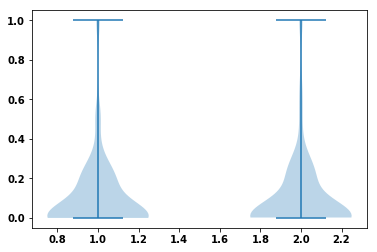

In [57]:
plt.violinplot([gamblers_results['Cooperation_rating'], best_results['Cooperation_rating']]);

In [59]:
# fig, ax = plt.subplots()

# plt.scatter(range(x), gambler_coop, label="Gambler(2, 1, 1)", color="black")
# plt.scatter(
#     range(x),
#     best_coop,
#     marker="x",
#     label="Best response memory-one",
#     color="red",
#     s=70,
# )

# plt.ylabel("Cooperating Ratio", fontsize=10, fontweight="bold")
# lgd = plt.legend(
#     bbox_to_anchor=(0.0, 1.02, 1.0, 0.102),
#     loc=3,
#     ncol=2,
#     mode="expand",
#     borderaxespad=0.0,
# )

# fig.tight_layout()

In [60]:
ps_columns = ["CC_to_C_rate",
              "CD_to_C_rate",
              "DC_to_C_rate",
              "DD_to_C_rate"]

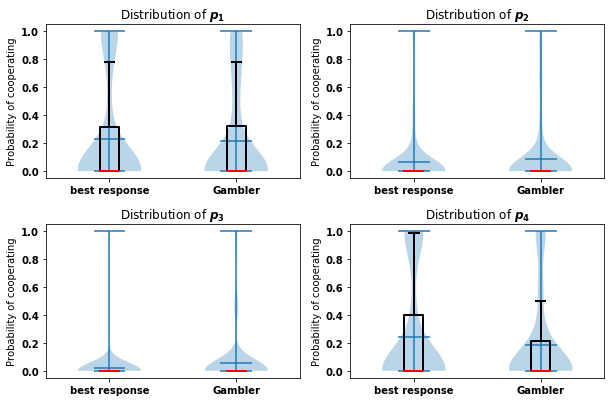

In [61]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6.5))

for i, p in enumerate(ps_columns):
    index = (int(i / 2), i % 2)

    axes[index].violinplot(
        [best_results[p], gamblers_results[p].values],
        showmeans=True,
    )

    boxes = axes[index].boxplot(
        [best_results[p].values, gamblers_results[p].values], showfliers=False
    )
    for bp in boxes['medians']:
        bp.set_color('red')
        bp.set_linewidth(2)
    for bp in boxes['caps']:
        bp.set_color('black')
        bp.set_linewidth(2)
    for bp in boxes['whiskers']:
        bp.set_color('black')
        bp.set_linewidth(2)
    for bp in boxes['boxes']:
        bp.set_color('black')
        bp.set_linewidth(2)

    axes[index].set_title('Distribution of $p_%s$' % (i + 1), fontweight= 'medium')
    axes[index].set_ylabel('Probability of cooperating', fontweight= 'medium')
    matplotlib.pyplot.subplots_adjust(wspace = 0.2, hspace = 0.3)

    plt.setp(axes[index], xticks=[1, 2], xticklabels=["best response", "Gambler"])


    
plt.savefig('../img/gambler_vs_mem_violinplot.pdf')

In [62]:
for q_one, q_two, gambler in zip(df_with_g.loc[:, df_with_g.columns.str.contains('first')].values,
                                    df_with_g.loc[:, df_with_g.columns.str.contains('second')].values,
                                    df_with_g.loc[:, df_with_g.columns.str.contains('gambler_paramater')].values):
    pass

In [63]:
utility = []
x = []
for i, row in df_with_g.iterrows():
    x.append(i)
    p = (row["mem_one_p_1"], row["mem_one_p_2"], row["mem_one_p_3"], row["mem_one_p_4"])
    q_1 = (
        row["first_opponent_q_1"],
        row["first_opponent_q_2"],
        row["first_opponent_q_3"],
        row["first_opponent_q_4"],
    )
    q_2 = (
        row["second_opponent_q_1"],
        row["second_opponent_q_2"],
        row["second_opponent_q_3"],
        row["second_opponent_q_4"],
    )
    utility.append(opt_mo.tournament_utility(p, [q_1, q_2]))


In [64]:
df_with_g["mem_one_utility"] = utility
x = range(len(df_with_g["gambler_utility"]))

In [72]:
bg_color = '#002B36'
color = '#FDF6E3'

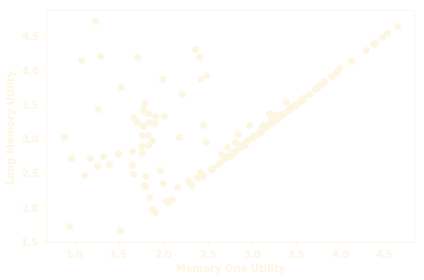

In [77]:
fig, axes = plt.subplots()

plt.scatter(df_with_g["mem_one_utility"],
            df_with_g["gambler_utility"],
            label="Gambler(2, 1, 1)", color=color)
# plt.scatter(
#     x,
#     df_with_g["mem_one_utility"],
#     marker="x",
#     label="Best response memory-one",
#     color="red",
#     s=70,
# )

plt.ylabel("Long Memory Utility", fontsize=10, fontweight="bold", color=color)
plt.xlabel("Memory One Utility", fontsize=10, fontweight="bold")
axes.spines['bottom'].set_color(color)
axes.spines['top'].set_color(color)
axes.spines['right'].set_color(color)
axes.spines['left'].set_color(color)
axes.xaxis.label.set_color(color)
axes.tick_params(axis='x', colors=color)
axes.tick_params(axis='y', colors=color)

fig.tight_layout()

fig.savefig("/Users/silversurfer/Documents/src/talks/talks/social dilemmas talk/static/result_gambler.pdf",
            transparent=True, facecolor=fig.get_facecolor())


# plt.savefig('../img/gambler_performance_against_mem_one.pdf')

In [57]:
gamblers_results["SSerror"] = gamblers_results.apply(
    lambda row: opt_mo.tools.get_least_squares(
        vector=[
            row["CC_to_C_rate"],
            row["CD_to_C_rate"],
            row["DC_to_C_rate"],
            row["DD_to_C_rate"],
        ]
    ),
    axis=1,
)

/anaconda3/envs/opt-mo/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


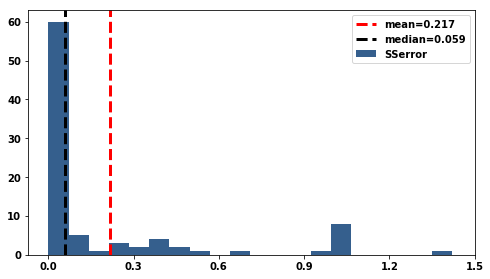

In [58]:
fig, axes = plt.subplots(figsize=(8, 4.5))

axes.hist(gamblers_results["SSerror"], bins=20, color=color);
axes.axvline(
    np.mean(gamblers_results["SSerror"]), color="red", linestyle="dashed", linewidth=3,
    label="mean=%s" % round(np.mean(gamblers_results["SSerror"]), 3)
)
axes.set_xticks(np.linspace(0, 1.5, 6))
axes.axvline(
    np.median(gamblers_results["SSerror"]),
    color="black",
    linestyle="dashed",
    linewidth=3,
    label="median=%s" % round(np.median(gamblers_results["SSerror"]), 3)
)
axes.legend();

plt.savefig('../img/gambler_sserror.pdf')

In [59]:
def describe(df, stats):
    d = df.describe(percentiles=[.05, .25, .30, .35, .5, .95])
    return d.append(df.reindex_axis(d.columns, 1).agg(stats))

In [60]:
sserror_table = pd.DataFrame(pd.DataFrame(describe(gamblers_results, ['median', 'skew', 'kurt'])['SSerror']))
sserror_table.iloc[3] = round(sserror_table.iloc[3], 3)
with open("../tex/gambler_sserror_table.tex", "w") as f:
    f.write(sserror_table.to_latex())

/anaconda3/envs/opt-mo/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [61]:
sserror_table

,SSerror
count,89.000000
mean,0.217056
std,0.332357
min,0.000000
5%,0.008553
25%,0.058824
30%,0.058824
35%,0.058824
50%,0.058824
95%,1.058824
